# Introduction to Machine Learning (ML)

by [@barbara_plank](https://twitter.com/barbara_plank)


<small>
[with parts inspired by many, amongst which: Anders Johannsen, Dirk Hovy, Malvina Nissim, sklearn tutorial.. thanks!]
</small>

### After this lecture

* You should know the basics of Machine Learning (data, features, model/algorithm/ training, evaluation)
* You will know a simple classification algorithm: `LogisticRegression`
* You will apply your knowledge by training a `LogisticRegression` model on sentiment analysis data (exercise)

## Machine learning = learning from data

learning what? 

to make **predictions**

* is today a good day to get an ice cream?
* what is the sentiment of this tweet?
* how is the weather in 24h from now?

## What do you do in front of a zebra crossing?

<img src="pics/zebracrossing.jpg">
[Example inspired by traffic light by M.Nissim]

## Zebra crossing

**STOP** or **GO**

How can we teach someone this behavior?

* create ad hoc **rules** (as exhaustive as possible)
* collect a set of real **examples** of what people do at a zebra crossing

### Examples

collect **examples** (cases) of zebra crossings and people's behavior (stop or go)

* zebra crossing $\rightarrow$ **features** (characteristics)
* result $\rightarrow$ **label** (category: stop, go)

with these examples we can use machine learning to **induce** a classifier (= **build a predictor**) that **generalizes** from the observed exampels

## Why can't we just build a predictor by coding it up?

* can't be exhaustive enough
* often we don't know how
* trade-off between cost of obtaining **data** versus **knowledge**

### Machine Learning versus traditional programming

<img src="pics/prog-vs-ml.png" width=600>

## Machine Learning is ubiquitous

* recommended books in online book stores
* your spam classifier
* automatic machine translation
* NetFlix movie recommendation


## ML is the future, and you know it
*Name one thing that computers cannot do today but might be able to accomplish in five years.*



- "Make interesting conversational partners"
- "Flawless object recognition (when objects are shown from an unfamiliar angle)"
- "Cook food via robots?"
- "Summarize the plot of a movie by visual analysis."


## Machine Learning tasks



* **Supervised learning**: predict target *y* from input *X*
  * **y** category or "class" label (or target label) ==> **classification**
  * **y** is a real value ==> **regression**
  
* **Unsupervised learning** (learning in the light of no labeled data, only X, clustering/density estimation, we will not touch upon this)

## Classification

In classification we assign a *discrete* label to an object (class/label/target label)

<img src="pics/running.jpg" width=400>


For instance, **what kind of food is passing on the running belt**?

In programming terms, a classifier is an algorithm for deciding which category the object belongs to.
In math terms, a classifier is a function that maps the object to a set of discrete categories.

### Function notation

$$f: \mathbb{R} \mapsto \mathbb{R}$$

In [90]:
def triple(a_number):
    return 3 * a_number

$$f: \mathbb{R} \mapsto \{0, 1\}$$

In [108]:
def is_expensive_house(house_price):
    if house_price > 1000000:
        return 1
    else: 
        return 0

### Classifier as a function

Formally, we can think of a classifier as a mathmatical function $h$, mapping from the input $x$ to one of $k$ output categories. Often the input $x \in \mathbb{R}^d$ is a vector of real numbers.

$$h: \mathbb{R}^d \mapsto \{1, 2, \ldots, k\} $$

Often our instances are represented with a binary vector (which tells us which feature/clue is 'active'/on), here $x \in \mathbf{2}^d$, for example [0,1,0,0,1,1]:

$$h: \mathbf{2}^d \mapsto \{1, 2, \ldots, k\}$$



In general:

$$h: \mathcal{X} \mapsto \mathcal{Y}$$


In [92]:
# you can with of an `instance` as a set of properties 
# with the features as the 'clues' that help us determine the label
def classify_animal(instance):
    if 'extinct' in instance and'feathered' in instance:
        return 'dinosaur'
    elif 'feathered' in instance:
        return 'bird'
    else:
        return 'mammal'

## Machine learning algorithms

Machine learning algorithms are a special kind of algorithms that take data as input and return a new algorithm as output. E.g. 

$$f: \mathcal{D} \mapsto \left(\mathbb{R}^d \mapsto \{1, 2, \ldots, k\}\right)$$


We learn the algorithm on the basis of a set of examples, a **training set**:

$$\mathcal{D} = \{(x_1, f(x_1) ), \ldots (x_n, f(x_n)) \}$$


In general, we learn a function (parametrized by $w$, the weights to be learned) that can map inputs to outputs:

$$h_w: \mathcal{X} \mapsto \mathcal{Y}$$

What does learning mean? 

* It means to estimate the values for the parameters of a model $w$ 
* These **parameters** are typically also called **weights** (sometimes denoted $\theta$)
* For example in a simple linear model we can try to find the weights that maximize the likelihood of producing our given data. This is typically done using an iterative process (more on this later). 

<img src="pics/learning-vp.png">
Src: "http://www.iro.umontreal.ca/~vincentp/ift3395/cours/FromLinearRegressionToNNets.pdf"

## ML 101: What we need

1. Data
  * what your data looks like, the input $X$ and output (labels) $Y$ 
2. Features
  * how to represent your data (the actual features): how to decompose $X$ into its parts by $\phi$
3. Model/Algorithm
  * the machine learning algorithm used 
4. Evaluation
  * how to measure how good your model is 

### Machine Learning - Supervised Learning: 
<img src="pics/learning.png" width=800>

## Recap: Classification vs Regression


The goal of machine learning is to find a function $f$ that, given some input $x$, produces predictions for that input, $y$.

In **supervised machine learning** the y’s are given, and are called the labels. They can be categorial, like ”sports”, ”news”, etc. or numerical, e.g. 7, 8,10. If the labels are categorical we speak of **classification**, in case of numerical labels the task is **regression**.

## Recap - Notation:

* We will use *x* to denote the 'input' variables (also called the features)
* and *y* to denote the 'output' or target (or label or class)
* A pair *(x,y)* is called a training instance
* A entire dataset of pairs *(x,y)* is called a training set $\mathcal{D}$
* The set of all output values is denoted $\mathcal{Y}$
* $\mathcal{X}$ denotes the space of input values
* Given a training set $\mathcal{D}$, the task is to learn a function $h: \mathcal{X} \mapsto \mathcal{Y}$ so that $h(x)$ is a good predictor for the corresponding value of $y$


## Example: Training a classifier on the IRIS dataset

In this section, we will train a classifier on the [IRIS data set](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html). 

<img src="pics/iris.png">
This data set is about plants and it is included in `sklearn`. It is ready to use, meaning that features are already extracted for the data instances x, and each training instance has an associated class label y. In the next section we will see how to extract features and use them in sklearn.
The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Technically, it is stored as a python dict, thus we can see dict.keys() to inspect what it contains:

In [24]:
from sklearn import datasets
iris = datasets.load_iris()


The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Tech- nically, it is stored as a python dict, thus we can see dict.keys() to inspect what it contains:

In [25]:
iris.keys()

dict_keys(['target', 'data', 'feature_names', 'target_names', 'DESCR'])

In [26]:
# the possible Y's (labels/categories)
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Looking at the labels of the IRIS dataset:

In [27]:
import numpy as np
iris_X = iris.data
iris_y = iris.target
## in sklearn labels/categories are actually encoded as numbers!
print(np.unique(iris_y))

[0 1 2]


### How do the examples/data instances/cases look like?

Each training instance consists of 4 attributes (thus is 4-dimensional, or a vector with 4 dimensions), in this case numerical measurements. We can get a description using feature_names. For instance, lets look at the first data instance $x_0$:

In [28]:
iris_X[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [29]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<img src="http://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" width=300>

### How are the target (class labels) stored?

The class labels y for the instances are actually stored as integers (indices corresponding to the respective target_names entry). Thus, the first instances is of type setosa:

In [30]:
iris_y[0]

0

In [32]:
# readable name
iris['target_names'][iris_y[0]]

'setosa'

## Training 


Now that we know how the data looks like, we are ready to train a classifier. Say for this toy example we train it on 80% of the data, and evaluate on the remaining 20%. Let us train a simple logistic regression classifier with `sklearn`.

In [37]:
## Training a Logistic Regression classifier on the Iris data
#!/usr/bin/python
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 3 classes, 150 instances: X=iris[’data’]  y=iris[’target’]
iris = datasets.load_iris()
# create random permutation with seed (comment to get a random permutation)
np.random.seed(113)
indices = np.random.permutation(len(iris['data']))
# split in 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

# output statistics
print("#inst train: %s" % (len(X_train)))
print("#inst test: %s" % (len(X_test)))
# learn a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print("Pred:", y_pred)
print("Gold:", y_test)
print(classification_report(y_test, y_pred, target_names=iris['target_names']))

#inst train: 120
#inst test: 30
Pred: [0 1 0 2 1 2 0 0 1 2 0 2 0 0 0 0 2 0 1 2 1 0 0 0 1 1 0 1 0 0]
Gold: [0 1 0 2 1 2 0 0 1 1 0 2 0 0 0 0 2 0 1 2 1 0 0 0 1 1 0 1 0 0]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.89      0.94         9
  virginica       0.83      1.00      0.91         5

avg / total       0.97      0.97      0.97        30



### Confusion matrix



In [38]:
print(confusion_matrix(y_test, y_pred).T)

[[16  0  0]
 [ 0  8  0]
 [ 0  1  5]]


In [39]:
## an alternative
import pandas as pd
def crosstab(pred, gold):
    y_true = pd.Series([iris['target_names'][g] for g in gold])
    y_pred = pd.Series([iris['target_names'][p] for p in pred])
    print(pd.crosstab(y_true, y_pred, rownames=['True:'], colnames=['Predicted:'], margins=True))
    
crosstab(y_test, y_pred)

Predicted:  setosa  versicolor  virginica  All
True:                                         
setosa          16           0          0   16
versicolor       0           8          0    8
virginica        0           1          5    6
All             16           9          5   30


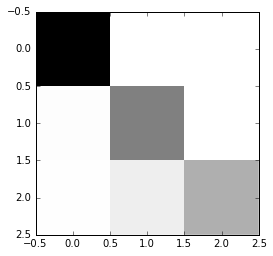

In [40]:
% matplotlib inline
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf.T, cmap='binary', interpolation='None')
plt.show()

## Logistic Regression: What is happening behind the scenes?

Logistic regression is a simple linear ML classifier (despite its name 'regression' it is a **classification** algorithm, outputing discrete labels):

$h(x): \sigma(w^T \cdot x) $

where $\sigma$

$\sigma = \frac{1}{1+e^{-z}}$

is called the *logistic function* or the *sigmoid function*.

The LR classifier is defined as:

$$h(x)= \sigma(w^T \cdot x) = 
\begin{cases}
    \ge 0.5 & y = 1\\
    < 0.5 & y = 0
\end{cases}$$

What does the classifier do? Once it has learned weights ($\theta$), it sums the weights and features (weighted sum):

     scores = (weighted sum of features and weights)

which is: $w^T x$ 

And subsequently applies the `sigmoid` ($\sigma$) to get the final prediction.

In [41]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

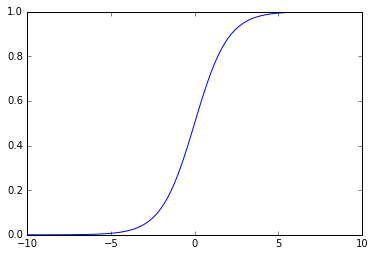

In [42]:
%matplotlib inline 
# Visualizing the sigmoid
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x,sig)

### Where are the weights coming from?

In logistic regression we want to minimize the classification error:

$$y_i - \sigma(w^T x_i)$$

So, we want to learn the weights $w$ (sometimes denoted $\theta$) from the learning data. There are various ways to do so. One way is to use gradient based methods (that look at the partial derivative of the *loss* function) to find parameter values. 

They typically start out with some initial $\theta$ and update it repeatedly:

$ w{j} = w_j - \alpha \frac{\partial }{\partial w_j} L(w)$

It turns out (for a single instance) in logistic regression the gradient is:

 ($y - h_w(x)) * x$

For a single training instance, this yields the following update rule:

$ w_{j} = w_j - \alpha (y - h_{w}(x)) x$


More details can be found in:
* [Andrew Ng's notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
* [Nick Becker's notebook (and references therein)](https://github.com/beckernick/logistic_regression_from_scratch/blob/master/logistic_regression_scratch.ipynb)

### Lets have a look at a simpler example - First generate some data


In [43]:
import pandas as pd

num_observations = 500

x_neg = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x_pos = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x_neg, x_pos)).astype(np.float32)
simulated_labels = np.array(np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))).astype(int)

data = pd.DataFrame({'x1': np.concatenate([x_neg[:,0],x_pos[:,0]]),
                     'x2': np.concatenate([x_neg[:,1],x_pos[:,1]]),
                     'label': simulated_labels})

data.head()

,label,x1,x2
0,0,-0.413599,-0.662105
1,0,-1.038840,-0.351690
2,0,-2.436538,-1.661808
3,0,1.192142,0.783097
4,0,1.016685,1.628277


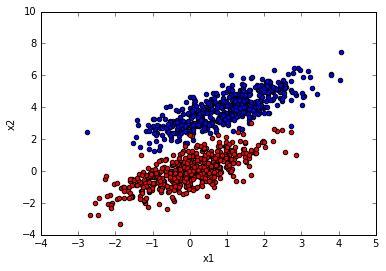

In [44]:
# plot the data
fig, ax = plt.subplots()

data.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
data.query('label == 0').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');

## Learning the weights with stochastic gradient descent

In [45]:
def logistic_regression(features, target, num_steps, learning_rate):
    """
    modified code from beckernick
    (this implements the 'stochastic' version - slower)
    """
    bias = np.ones((features.shape[0], 1))
    features = np.hstack((bias, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        total_loss=0
        # go over the instances
        for f, t in zip(features, target):
            scores = np.dot(f, weights)
            predictions = sigmoid(scores)

            # Update weights
            loss = t - predictions
            gradient = np.dot(f.T, loss)
            weights += learning_rate * gradient
            total_loss += loss
            
        if step % 1000 == 0 and step > 0:
            print(step, total_loss)
            
    return weights

In [46]:
X_train, X_test, y_train, y_test = train_test_split(simulated_separableish_features, simulated_labels, test_size=0.2)

weights = logistic_regression(X_train, y_train,
                     num_steps = 15000, learning_rate = 5e-5)
print("Model (weights):")
print(weights)

1000 -25.0915689449
2000 -13.8449341002
3000 -9.74417836537
4000 -7.58804787111
5000 -6.24596034876
6000 -5.32448404362
7000 -4.64976516372
8000 -4.13273157273
9000 -3.72287237918
10000 -3.38933482298
11000 -3.11217097412
12000 -2.87789004821
13000 -2.67702901036
14000 -2.50274631095
Model (weights):
[-6.87177428 -2.17932302  3.99183032]


How good are these weights? Lets compare with `sklearn`.

In [47]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.intercept_, clf.coef_)
print(weights)

[-5.29246421] [[-1.69513242  3.16192486]]
[-6.87177428 -2.17932302  3.99183032]


In [48]:
## plot utility functions from AJ and DH
def get_y(x, w1, w2, bias):
    '''
    compute y value for specific x, given the weights and bias
    (helper function for decision boundary)
    '''
    return (((-1 * x * w1) - bias) / w2)


def plot_decision_boundary(model, ax, alpha=0.1, color='black', thickness=1):
    '''
    plot the decision boundary
    '''
    bias, w1, w2 = model
    x_min = -4
    x_max = 4
    ax.plot([x_min, x_max], 
            [get_y(x_min, w1, w2, bias), get_y(x_max, w1, w2, bias)], 
            'k-', alpha=alpha, c=color, lw=thickness)

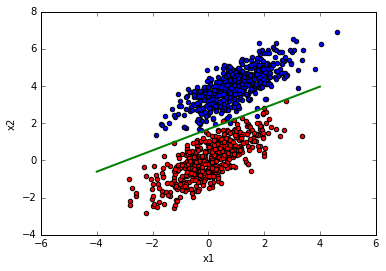

In [44]:
# plot the data and decision boundary
fig, ax = plt.subplots()

data.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
data.query('label == 0').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');
plot_decision_boundary(weights, alpha=1.0, color='green', thickness=2, ax=ax)

### Evaluate accuracy of classifier

In [88]:
from sklearn.metrics import accuracy_score

def predict(input_X, weights):
    bias = np.ones((input_X.shape[0], 1))
    features = np.hstack((bias, input_X))
    scores = np.dot(features, weights)
    predictions = [1 if h>=0.5 else 0 for h in sigmoid(scores)]
    return predictions

predictions = predict(X_test, weights)
print(predictions)

print(accuracy_score(y_test, predictions))

[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
0.995


In [89]:
predictions_sklearn = clf.predict(X_test)
print(accuracy_score(y_test, predictions_sklearn))

0.995


## Extracting features from text data

In order to run a machine learning algorithm, we first need to **decompose** the original text data into a **set of features**. This process is called featurization (or extracting features from data, or **vectorization**). It means that we turn the original content into a feature vector, a vector with of numerical values where each dimension of the vector corresponds to a particular **feature** that we had in mind.

### Features / feature templates / clues
In NLP, we typically have a *lot* of features (not just the 4 we saw in the IRIS example). Typically, we work with entire *vocabularies*. When we speak of a *feature* in NLP we typically mean a *feature template* (which gets instantiated to a set of values). 

For example, when we say we use unigrams (single words) as features, this is actually a feature template that gets instantiated. This means the **values** of the examples are 

You can imagine that every instance is represented as a long vector (a high-dimensional vector; each dimension is a features). If you have 10000 features, you can imagine a vector of 10000 length, or 1000 dimensions. For every feature that is active for a given example, you turn the vector dimension 'on' (save it as a 1). 

Now in practice, we won't work with superlong vectors. They are becoming easily too big to process. Why?

Sklearn is handling the data in sparse format for you. You don't need to worry about it!

#### Bag-of-words 

A very simple way to decompose the input text is to make a 'bag-of-words' representation. Here we break the input text down into single words, and the feature vector encodes with words it has seen for a given instance.

<img src="pics/bow1.png" width=300>

For example, the following two instances would be represented in a BOW model as:

<img src="pics/bow2.png">

You can decide which features to include, maybe not always all words are good predictors for your target variable. For example, in the case of sentiment analysis. We could decide to only use content words and punctuation as features, e.g.,

<img src="pics/bow3.png">

Note, however, that typically the ML system does not store large feature vectors. In particular, when working with text data **a lot of features in X will be zero**, i.e., only a few words actually occur in a particular instance/example. Storing the long vector would be very inefficient. Thus, internally sklearn keeps a **sparse** representation of the features. See more [here](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

What features you use is crucial for a machine learning system, and can make a big performance difference. 

Scikit-learn (sklearn) includes a range of build-in featurizers, such as the `CountVectorizer`, `TfidfVectorizer` or `DictVectorizer`.

# Example 1: Sentiment Classification

Go to the folder 'exercise'. Retrieve the code. Go through the code with your neighbor. Fill
out the blanks. Make sure you understand all parts of the code. 

## How do we know that our model generalized?

We want to build a classifier that generalizes, i.e., that it works *beyond* the training data.

A classifier generalizes reasonably well if it can predict with acceptable performance on new **unseen** test cases.

## Evaluation



* **Accuracy**: out of all predictions, how many are correct


Precision, Recall and F1:

* **precision**: out of those predicted as a label, how many were correct?
* **recall**: how many instances, out of all instances of a specific label, did the classifier predict correctly?
* **f1-score**: harmonic mean of precision and recall (f1 has beta=1, i.e., both precision and recall are equally important)
* support: the number of occurrences of each class in `y_true`.

<img src="pics/precision_recall.png" width=500>

<img src="pics/fscore.png" width=500>

## But now that we get a number, how do we know it is good enough?

We need a *baseline*!

# References

* [sklearn: Working with text data](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
* [Andrew Ng's course notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
* [Andrew Ng's video session on Logistic Regression](https://www.youtube.com/watch?v=LLx4diIP83I)
* [ESSLLI 2016 lecture 1 by M.Nissim and J.Bjerva](http://esslli2016.unibz.it/wp-content/uploads/2015/10/lecture1.pdf)